### PYRCO MACHINE LEARNING MODEL
GOALS:
-REDUCE TIME
- IMPROVE AMOUNT OF M2 OF PAINTING
- PREVENT REPARINGS IN MACHINES
- FORESEE PROBLEMS AND SOLUTIONS
- IMPROVE THE REVENUE OF THE COMPANY $/M2

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
import datetime as dt


pyrco_file= "C:/Users/chris/OneDrive/Desktop/Cursos y Bootcamps de Programación/Machine_Learning/Projects_HO_ML/Painting_Tracking_ML_model.xlsx"
pyrco_dataset= pd.read_excel(pyrco_file, header=37)

In [2]:
pyrco_dataset

,Unnamed: 0,Ítem,Ubicación,Paño,Ejes,L,N,almas pintadas,h efec alma(mm),A,...,F,Total Area,Unidad,Realizado 1/0,Cantidad Ejecutada Cuacho Clorado,Fecha de Progreso Caucho Clorado,Realizado 1/0.1,Cantidad Ejecutada Intumescente,Fecha de Progreso Intumescente,Unnamed: 25
0,NaN,VP-14 I1100×350×15×20,Nivel +12.00 -Bloque 4,1.0,"34(B-C),33(B-C)",3.94,2.0,1.0,1060,1.060,...,1.745,13.75,m2,1.0,13.75,2025-06-10,1.0,13.75,2025-06-23,0
1,NaN,VP-8 I750×220×10×15,Nivel +12.00 -Bloque 4,1.0,33-34(C ),12.25,1.0,2.0,720,1.440,...,2.080,25.48,m2,1.0,25.48,2025-06-10,1.0,25.48,2025-06-23,0
2,NaN,VP-8 I750×220×10×15,Nivel +12.00 -Bloque 4,1.0,33(C-D),9.3,1.0,2.0,720,1.440,...,2.080,19.34,m2,1.0,19.34,2025-06-10,1.0,19.34,2025-06-23,0
3,NaN,VP-8 I750×220×10×15,Nivel +12.00 -Bloque 4,1.0,34(C-D),9.3,1.0,1.0,720,0.720,...,1.150,10.70,m2,1.0,10.70,2025-06-10,1.0,10.70,2025-06-23,0
4,NaN,VP-1 I500×200×8×12,Nivel +12.00 -Bloque 4,1.0,33-34(C-D)(1),1.9,1.0,2.0,476,0.952,...,1.536,2.92,m2,1.0,2.92,2025-06-10,1.0,2.92,2025-06-23,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1108,NaN,VP-8 I750×220×10×15,Nivel +23.52 -Bloque 1,8.0,1(F-G),6.3,1.0,2.0,720,1.440,...,2.080,13.10,m2,1.0,13.10,2025-07-14,1.0,13.10,2025-07-21,NaN
1109,NaN,VP-8 I750×220×10×15,Nivel +23.52 -Bloque 1,8.0,2(F-G),6.3,1.0,2.0,720,1.440,...,2.080,13.10,m2,1.0,13.10,2025-07-14,1.0,13.10,2025-07-16,NaN
1110,NaN,VP-1 I500×200×8×12,Nivel +23.52 -Bloque 1,8.0,1'(F-G),6.7,1.0,2.0,476,0.952,...,1.536,10.29,m2,1.0,10.29,2025-07-14,1.0,10.29,2025-07-22,NaN
1111,NaN,B-1 I500×200×6×8,Nivel +23.52 -Bloque 1,8.0,1-2(F-G),9.25,4.0,2.0,484,0.968,...,1.556,57.57,m2,1.0,57.57,2025-07-15,1.0,57.57,2025-07-16,NaN


In [3]:
pyrco_dataset.shape

(1113, 26)

In [4]:
pyrco_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1113 entries, 0 to 1112
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Unnamed: 0                         44 non-null     object        
 1   Ítem                               874 non-null    object        
 2   Ubicación                          883 non-null    object        
 3   Paño                               874 non-null    float64       
 4   Ejes                               874 non-null    object        
 5   L                                  875 non-null    object        
 6   N                                  874 non-null    float64       
 7   almas pintadas                     872 non-null    float64       
 8   h efec alma(mm)                    873 non-null    object        
 9   A                                  906 non-null    float64       
 10  patin inferior pintado             8

In [5]:
pyrco_dataset.describe().round()

,Paño,N,almas pintadas,A,patin inferior pintado,b patin(mm),B,patin interior pintado,b efect patin interior (mm),C,F,Total Area,Realizado 1/0,Cantidad Ejecutada Cuacho Clorado,Fecha de Progreso Caucho Clorado,Realizado 1/0.1,Cantidad Ejecutada Intumescente,Fecha de Progreso Intumescente
count,874.0,874.0,872.0,906.0,872.0,872.0,907.0,872.0,872.0,908.0,872.0,874.0,815.0,837.0,815,659.0,690.0,659
mean,4.0,2.0,2.0,1.0,1.0,204.0,0.0,2.0,195.0,0.0,2.0,29.0,1.0,28.0,2025-07-03 06:28:42.699386624,1.0,27.0,2025-07-06 17:11:22.852807168
min,1.0,0.0,1.0,0.0,0.0,100.0,0.0,1.0,97.0,0.0,1.0,0.0,1.0,0.0,2025-06-10 00:00:00,1.0,0.0,2025-06-23 00:00:00
25%,2.0,1.0,2.0,1.0,1.0,200.0,0.0,2.0,192.0,0.0,2.0,10.0,1.0,9.0,2025-06-25 00:00:00,1.0,8.0,2025-06-27 00:00:00
50%,3.0,1.0,2.0,1.0,1.0,200.0,0.0,2.0,192.0,0.0,2.0,16.0,1.0,16.0,2025-07-02 00:00:00,1.0,15.0,2025-07-05 00:00:00
75%,5.0,2.0,2.0,1.0,1.0,200.0,0.0,2.0,192.0,0.0,2.0,33.0,1.0,31.0,2025-07-14 00:00:00,1.0,29.0,2025-07-16 00:00:00
max,10.0,8.0,2.0,2.0,1.0,350.0,2.0,2.0,335.0,1.0,3.0,199.0,1.0,199.0,2025-07-24 00:00:00,1.0,199.0,2025-07-24 00:00:00
std,2.0,2.0,0.0,0.0,0.0,28.0,0.0,0.0,27.0,0.0,0.0,32.0,0.0,32.0,NaN,0.0,32.0,NaN


In [6]:
pyrco_dataset.drop(pyrco_dataset.columns[[0,25]],axis=1, inplace= True)

In [7]:
#pyrco_dataset.drop(1117, axis=0, inplace= True)

In [8]:
pyrco_dataset

,Ítem,Ubicación,Paño,Ejes,L,N,almas pintadas,h efec alma(mm),A,patin inferior pintado,...,C,F,Total Area,Unidad,Realizado 1/0,Cantidad Ejecutada Cuacho Clorado,Fecha de Progreso Caucho Clorado,Realizado 1/0.1,Cantidad Ejecutada Intumescente,Fecha de Progreso Intumescente
0,VP-14 I1100×350×15×20,Nivel +12.00 -Bloque 4,1.0,"34(B-C),33(B-C)",3.94,2.0,1.0,1060,1.060,1.0,...,0.335,1.745,13.75,m2,1.0,13.75,2025-06-10,1.0,13.75,2025-06-23
1,VP-8 I750×220×10×15,Nivel +12.00 -Bloque 4,1.0,33-34(C ),12.25,1.0,2.0,720,1.440,1.0,...,0.420,2.080,25.48,m2,1.0,25.48,2025-06-10,1.0,25.48,2025-06-23
2,VP-8 I750×220×10×15,Nivel +12.00 -Bloque 4,1.0,33(C-D),9.3,1.0,2.0,720,1.440,1.0,...,0.420,2.080,19.34,m2,1.0,19.34,2025-06-10,1.0,19.34,2025-06-23
3,VP-8 I750×220×10×15,Nivel +12.00 -Bloque 4,1.0,34(C-D),9.3,1.0,1.0,720,0.720,1.0,...,0.210,1.150,10.70,m2,1.0,10.70,2025-06-10,1.0,10.70,2025-06-23
4,VP-1 I500×200×8×12,Nivel +12.00 -Bloque 4,1.0,33-34(C-D)(1),1.9,1.0,2.0,476,0.952,1.0,...,0.384,1.536,2.92,m2,1.0,2.92,2025-06-10,1.0,2.92,2025-06-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1108,VP-8 I750×220×10×15,Nivel +23.52 -Bloque 1,8.0,1(F-G),6.3,1.0,2.0,720,1.440,1.0,...,0.420,2.080,13.10,m2,1.0,13.10,2025-07-14,1.0,13.10,2025-07-21
1109,VP-8 I750×220×10×15,Nivel +23.52 -Bloque 1,8.0,2(F-G),6.3,1.0,2.0,720,1.440,1.0,...,0.420,2.080,13.10,m2,1.0,13.10,2025-07-14,1.0,13.10,2025-07-16
1110,VP-1 I500×200×8×12,Nivel +23.52 -Bloque 1,8.0,1'(F-G),6.7,1.0,2.0,476,0.952,1.0,...,0.384,1.536,10.29,m2,1.0,10.29,2025-07-14,1.0,10.29,2025-07-22
1111,B-1 I500×200×6×8,Nivel +23.52 -Bloque 1,8.0,1-2(F-G),9.25,4.0,2.0,484,0.968,1.0,...,0.388,1.556,57.57,m2,1.0,57.57,2025-07-15,1.0,57.57,2025-07-16


In [9]:
pyrco_dataset.describe().round()

,Paño,N,almas pintadas,A,patin inferior pintado,b patin(mm),B,patin interior pintado,b efect patin interior (mm),C,F,Total Area,Realizado 1/0,Cantidad Ejecutada Cuacho Clorado,Fecha de Progreso Caucho Clorado,Realizado 1/0.1,Cantidad Ejecutada Intumescente,Fecha de Progreso Intumescente
count,874.0,874.0,872.0,906.0,872.0,872.0,907.0,872.0,872.0,908.0,872.0,874.0,815.0,837.0,815,659.0,690.0,659
mean,4.0,2.0,2.0,1.0,1.0,204.0,0.0,2.0,195.0,0.0,2.0,29.0,1.0,28.0,2025-07-03 06:28:42.699386624,1.0,27.0,2025-07-06 17:11:22.852807168
min,1.0,0.0,1.0,0.0,0.0,100.0,0.0,1.0,97.0,0.0,1.0,0.0,1.0,0.0,2025-06-10 00:00:00,1.0,0.0,2025-06-23 00:00:00
25%,2.0,1.0,2.0,1.0,1.0,200.0,0.0,2.0,192.0,0.0,2.0,10.0,1.0,9.0,2025-06-25 00:00:00,1.0,8.0,2025-06-27 00:00:00
50%,3.0,1.0,2.0,1.0,1.0,200.0,0.0,2.0,192.0,0.0,2.0,16.0,1.0,16.0,2025-07-02 00:00:00,1.0,15.0,2025-07-05 00:00:00
75%,5.0,2.0,2.0,1.0,1.0,200.0,0.0,2.0,192.0,0.0,2.0,33.0,1.0,31.0,2025-07-14 00:00:00,1.0,29.0,2025-07-16 00:00:00
max,10.0,8.0,2.0,2.0,1.0,350.0,2.0,2.0,335.0,1.0,3.0,199.0,1.0,199.0,2025-07-24 00:00:00,1.0,199.0,2025-07-24 00:00:00
std,2.0,2.0,0.0,0.0,0.0,28.0,0.0,0.0,27.0,0.0,0.0,32.0,0.0,32.0,NaN,0.0,32.0,NaN


In [10]:
pyrco_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1113 entries, 0 to 1112
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Ítem                               874 non-null    object        
 1   Ubicación                          883 non-null    object        
 2   Paño                               874 non-null    float64       
 3   Ejes                               874 non-null    object        
 4   L                                  875 non-null    object        
 5   N                                  874 non-null    float64       
 6   almas pintadas                     872 non-null    float64       
 7   h efec alma(mm)                    873 non-null    object        
 8   A                                  906 non-null    float64       
 9   patin inferior pintado             872 non-null    float64       
 10  b patin(mm)                        8

In [11]:
pyrco_dataset.head(20
                  )

,Ítem,Ubicación,Paño,Ejes,L,N,almas pintadas,h efec alma(mm),A,patin inferior pintado,...,C,F,Total Area,Unidad,Realizado 1/0,Cantidad Ejecutada Cuacho Clorado,Fecha de Progreso Caucho Clorado,Realizado 1/0.1,Cantidad Ejecutada Intumescente,Fecha de Progreso Intumescente
0,VP-14 I1100×350×15×20,Nivel +12.00 -Bloque 4,1.0,"34(B-C),33(B-C)",3.94,2.0,1.0,1060,1.060,1.0,...,0.335,1.745,13.75,m2,1.0,13.75,2025-06-10,1.0,13.75,2025-06-23
1,VP-8 I750×220×10×15,Nivel +12.00 -Bloque 4,1.0,33-34(C ),12.25,1.0,2.0,720,1.440,1.0,...,0.420,2.080,25.48,m2,1.0,25.48,2025-06-10,1.0,25.48,2025-06-23
2,VP-8 I750×220×10×15,Nivel +12.00 -Bloque 4,1.0,33(C-D),9.3,1.0,2.0,720,1.440,1.0,...,0.420,2.080,19.34,m2,1.0,19.34,2025-06-10,1.0,19.34,2025-06-23
3,VP-8 I750×220×10×15,Nivel +12.00 -Bloque 4,1.0,34(C-D),9.3,1.0,1.0,720,0.720,1.0,...,0.210,1.150,10.70,m2,1.0,10.70,2025-06-10,1.0,10.70,2025-06-23
4,VP-1 I500×200×8×12,Nivel +12.00 -Bloque 4,1.0,33-34(C-D)(1),1.9,1.0,2.0,476,0.952,1.0,...,0.384,1.536,2.92,m2,1.0,2.92,2025-06-10,1.0,2.92,2025-06-23
5,VP-1 I500×200×8×12,Nivel +12.00 -Bloque 4,1.0,(C-D)(33-34)(2),3.9,1.0,2.0,476,0.952,1.0,...,0.384,1.536,5.99,m2,1.0,5.99,2025-06-10,1.0,5.99,2025-06-23
6,B-6 I750×200×8×12,Nivel +12.00 -Bloque 4,1.0,33-34(B-C),13,2.5,2.0,726,1.452,1.0,...,0.384,2.036,66.17,m2,1.0,66.17,2025-06-10,1.0,66.17,2025-06-23
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT
8,VP-8 I750×220×10×15,Nivel +12.00 -Bloque 4,1.0,33-34(D),12.25,1.0,2.0,720,1.440,1.0,...,0.420,2.080,25.48,m2,1.0,25.48,2025-06-10,1.0,25.48,2025-06-23
9,VP-8 I750×220×10×15,Nivel +12.00 -Bloque 4,1.0,33(D-E),9.3,1.0,2.0,720,1.440,1.0,...,0.420,2.080,19.34,m2,1.0,19.34,2025-06-10,1.0,19.34,2025-06-23


In [12]:
#pyrco_dataset.rename(columns={"Unnamed: 24":"Fecha_Progreso_IN","Fecha de Progreso IN": "Fecha_progreso_CC"},inplace=True)

In [13]:
pyrco_dataset.head(3)

,Ítem,Ubicación,Paño,Ejes,L,N,almas pintadas,h efec alma(mm),A,patin inferior pintado,...,C,F,Total Area,Unidad,Realizado 1/0,Cantidad Ejecutada Cuacho Clorado,Fecha de Progreso Caucho Clorado,Realizado 1/0.1,Cantidad Ejecutada Intumescente,Fecha de Progreso Intumescente
0,VP-14 I1100×350×15×20,Nivel +12.00 -Bloque 4,1.0,"34(B-C),33(B-C)",3.94,2.0,1.0,1060,1.06,1.0,...,0.335,1.745,13.75,m2,1.0,13.75,2025-06-10,1.0,13.75,2025-06-23
1,VP-8 I750×220×10×15,Nivel +12.00 -Bloque 4,1.0,33-34(C ),12.25,1.0,2.0,720,1.44,1.0,...,0.420,2.080,25.48,m2,1.0,25.48,2025-06-10,1.0,25.48,2025-06-23
2,VP-8 I750×220×10×15,Nivel +12.00 -Bloque 4,1.0,33(C-D),9.3,1.0,2.0,720,1.44,1.0,...,0.420,2.080,19.34,m2,1.0,19.34,2025-06-10,1.0,19.34,2025-06-23


In [14]:
pyrco_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1113 entries, 0 to 1112
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Ítem                               874 non-null    object        
 1   Ubicación                          883 non-null    object        
 2   Paño                               874 non-null    float64       
 3   Ejes                               874 non-null    object        
 4   L                                  875 non-null    object        
 5   N                                  874 non-null    float64       
 6   almas pintadas                     872 non-null    float64       
 7   h efec alma(mm)                    873 non-null    object        
 8   A                                  906 non-null    float64       
 9   patin inferior pintado             872 non-null    float64       
 10  b patin(mm)                        8

In [15]:
condition= pyrco_dataset["Total Area"].isnull()

In [16]:
pyrco_dataset[condition]

,Ítem,Ubicación,Paño,Ejes,L,N,almas pintadas,h efec alma(mm),A,patin inferior pintado,...,C,F,Total Area,Unidad,Realizado 1/0,Cantidad Ejecutada Cuacho Clorado,Fecha de Progreso Caucho Clorado,Realizado 1/0.1,Cantidad Ejecutada Intumescente,Fecha de Progreso Intumescente
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT
16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT
24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT
35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT
43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1073,NaN,Nivel +23.52 -Bloque 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT
1082,NaN,Nivel +23.52 -Bloque 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT
1091,NaN,Nivel +23.52 -Bloque 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT
1099,NaN,Nivel +23.52 -Bloque 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT


In [17]:
condition= pyrco_dataset["L"].notnull()
pyrco_dataset[condition]

,Ítem,Ubicación,Paño,Ejes,L,N,almas pintadas,h efec alma(mm),A,patin inferior pintado,...,C,F,Total Area,Unidad,Realizado 1/0,Cantidad Ejecutada Cuacho Clorado,Fecha de Progreso Caucho Clorado,Realizado 1/0.1,Cantidad Ejecutada Intumescente,Fecha de Progreso Intumescente
0,VP-14 I1100×350×15×20,Nivel +12.00 -Bloque 4,1.0,"34(B-C),33(B-C)",3.94,2.0,1.0,1060,1.060,1.0,...,0.335,1.745,13.75,m2,1.0,13.75,2025-06-10,1.0,13.75,2025-06-23
1,VP-8 I750×220×10×15,Nivel +12.00 -Bloque 4,1.0,33-34(C ),12.25,1.0,2.0,720,1.440,1.0,...,0.420,2.080,25.48,m2,1.0,25.48,2025-06-10,1.0,25.48,2025-06-23
2,VP-8 I750×220×10×15,Nivel +12.00 -Bloque 4,1.0,33(C-D),9.3,1.0,2.0,720,1.440,1.0,...,0.420,2.080,19.34,m2,1.0,19.34,2025-06-10,1.0,19.34,2025-06-23
3,VP-8 I750×220×10×15,Nivel +12.00 -Bloque 4,1.0,34(C-D),9.3,1.0,1.0,720,0.720,1.0,...,0.210,1.150,10.70,m2,1.0,10.70,2025-06-10,1.0,10.70,2025-06-23
4,VP-1 I500×200×8×12,Nivel +12.00 -Bloque 4,1.0,33-34(C-D)(1),1.9,1.0,2.0,476,0.952,1.0,...,0.384,1.536,2.92,m2,1.0,2.92,2025-06-10,1.0,2.92,2025-06-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1108,VP-8 I750×220×10×15,Nivel +23.52 -Bloque 1,8.0,1(F-G),6.3,1.0,2.0,720,1.440,1.0,...,0.420,2.080,13.10,m2,1.0,13.10,2025-07-14,1.0,13.10,2025-07-21
1109,VP-8 I750×220×10×15,Nivel +23.52 -Bloque 1,8.0,2(F-G),6.3,1.0,2.0,720,1.440,1.0,...,0.420,2.080,13.10,m2,1.0,13.10,2025-07-14,1.0,13.10,2025-07-16
1110,VP-1 I500×200×8×12,Nivel +23.52 -Bloque 1,8.0,1'(F-G),6.7,1.0,2.0,476,0.952,1.0,...,0.384,1.536,10.29,m2,1.0,10.29,2025-07-14,1.0,10.29,2025-07-22
1111,B-1 I500×200×6×8,Nivel +23.52 -Bloque 1,8.0,1-2(F-G),9.25,4.0,2.0,484,0.968,1.0,...,0.388,1.556,57.57,m2,1.0,57.57,2025-07-15,1.0,57.57,2025-07-16


In [18]:
pyrco_dataset.isnull().sum()

Ítem                                 239
Ubicación                            230
Paño                                 239
Ejes                                 239
L                                    238
N                                    239
almas pintadas                       241
h efec alma(mm)                      240
A                                    207
patin inferior pintado               241
b patin(mm)                          241
B                                    206
patin interior pintado               241
b efect patin interior (mm)          241
C                                    205
F                                    241
Total Area                           239
Unidad                               239
Realizado 1/0                        298
Cantidad Ejecutada Cuacho Clorado    276
Fecha de Progreso Caucho Clorado     298
Realizado 1/0.1                      454
Cantidad Ejecutada Intumescente      423
Fecha de Progreso Intumescente       454
dtype: int64

In [19]:
df_0=pyrco_dataset.dropna(how="any")

In [20]:
df_0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 657 entries, 0 to 1112
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Ítem                               657 non-null    object        
 1   Ubicación                          657 non-null    object        
 2   Paño                               657 non-null    float64       
 3   Ejes                               657 non-null    object        
 4   L                                  657 non-null    object        
 5   N                                  657 non-null    float64       
 6   almas pintadas                     657 non-null    float64       
 7   h efec alma(mm)                    657 non-null    object        
 8   A                                  657 non-null    float64       
 9   patin inferior pintado             657 non-null    float64       
 10  b patin(mm)                        657 non

In [21]:
#df_0["Fecha_progreso_CC"]=pd.to_datetime(df_0["Fecha_progreso_CC"])
#df_0["Fecha_Progreso_IN"]=pd.to_datetime(df_0["Fecha_Progreso_IN"])


In [22]:
df_0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 657 entries, 0 to 1112
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Ítem                               657 non-null    object        
 1   Ubicación                          657 non-null    object        
 2   Paño                               657 non-null    float64       
 3   Ejes                               657 non-null    object        
 4   L                                  657 non-null    object        
 5   N                                  657 non-null    float64       
 6   almas pintadas                     657 non-null    float64       
 7   h efec alma(mm)                    657 non-null    object        
 8   A                                  657 non-null    float64       
 9   patin inferior pintado             657 non-null    float64       
 10  b patin(mm)                        657 non

###  IMPUTATION
 - NUMERIC

 - CATEGORICAL

In [23]:
df_0.drop(df_0.columns[[8,11,14,15,18,21]], axis=1, inplace=True)
df_0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 657 entries, 0 to 1112
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Ítem                               657 non-null    object        
 1   Ubicación                          657 non-null    object        
 2   Paño                               657 non-null    float64       
 3   Ejes                               657 non-null    object        
 4   L                                  657 non-null    object        
 5   N                                  657 non-null    float64       
 6   almas pintadas                     657 non-null    float64       
 7   h efec alma(mm)                    657 non-null    object        
 8   patin inferior pintado             657 non-null    float64       
 9   b patin(mm)                        657 non-null    float64       
 10  patin interior pintado             657 non

C:\Users\chris\AppData\Local\Temp\ipykernel_29860\3316407870.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_0.drop(df_0.columns[[8,11,14,15,18,21]], axis=1, inplace=True)


In [24]:
median=df_0["Total Area"].median(skipna=True)

df_0["Total Area"].fillna(median, inplace=True)

C:\Users\chris\AppData\Local\Temp\ipykernel_29860\3058424226.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_0["Total Area"].fillna(median, inplace=True)
C:\Users\chris\AppData\Local\Temp\ipykernel_29860\3058424226.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_0["Total Area"].fillna(median, inplace=True)


In [25]:
df_0["Total Area"].describe()

count    657.000000
mean      28.793181
std       32.316961
min        0.500000
25%        8.980000
50%       16.060000
75%       31.200000
max      198.930000
Name: Total Area, dtype: float64

In [26]:
df_0.isnull().sum()

Ítem                                 0
Ubicación                            0
Paño                                 0
Ejes                                 0
L                                    0
N                                    0
almas pintadas                       0
h efec alma(mm)                      0
patin inferior pintado               0
b patin(mm)                          0
patin interior pintado               0
b efect patin interior (mm)          0
Total Area                           0
Unidad                               0
Cantidad Ejecutada Cuacho Clorado    0
Fecha de Progreso Caucho Clorado     0
Cantidad Ejecutada Intumescente      0
Fecha de Progreso Intumescente       0
dtype: int64

### More imputation

In [27]:
import seaborn as sns


<Axes: >

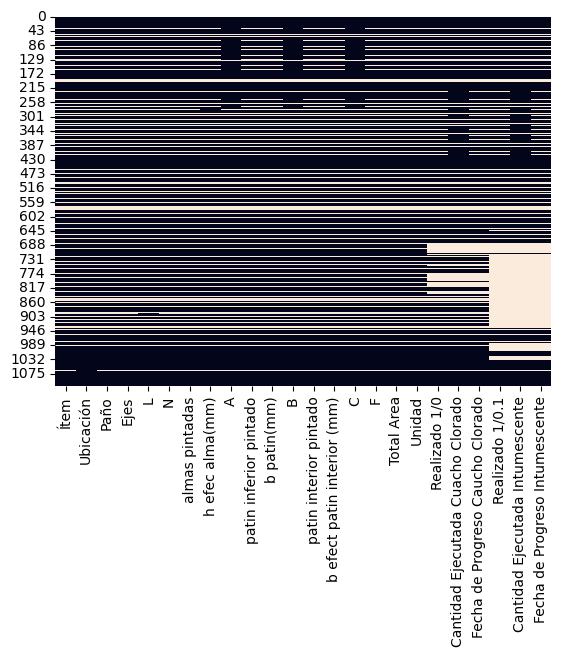

In [28]:
sns.heatmap(pyrco_dataset.isnull(),cbar=False)

<Axes: >

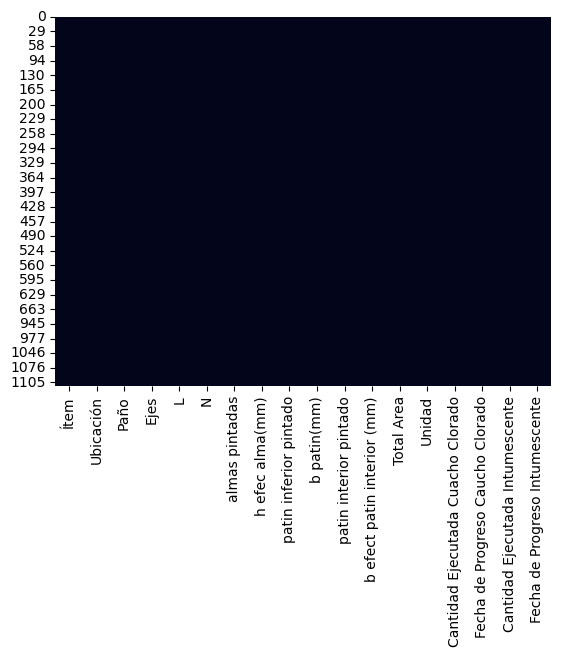

In [29]:
sns.heatmap(df_0.isnull(),cbar=False)

In [30]:
df_fill_na=pyrco_dataset


In [31]:
df_fill_na.drop(df_fill_na.columns[[8,11,14,15,18,21]], axis=1, inplace=True)

In [32]:
df_fill_na.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1113 entries, 0 to 1112
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Ítem                               874 non-null    object        
 1   Ubicación                          883 non-null    object        
 2   Paño                               874 non-null    float64       
 3   Ejes                               874 non-null    object        
 4   L                                  875 non-null    object        
 5   N                                  874 non-null    float64       
 6   almas pintadas                     872 non-null    float64       
 7   h efec alma(mm)                    873 non-null    object        
 8   patin inferior pintado             872 non-null    float64       
 9   b patin(mm)                        872 non-null    float64       
 10  patin interior pintado             8

In [33]:
df_fill_na.dropna(subset=["N","almas pintadas"], inplace=True)

In [34]:
df_fill_na

,Ítem,Ubicación,Paño,Ejes,L,N,almas pintadas,h efec alma(mm),patin inferior pintado,b patin(mm),patin interior pintado,b efect patin interior (mm),Total Area,Unidad,Cantidad Ejecutada Cuacho Clorado,Fecha de Progreso Caucho Clorado,Cantidad Ejecutada Intumescente,Fecha de Progreso Intumescente
0,VP-14 I1100×350×15×20,Nivel +12.00 -Bloque 4,1.0,"34(B-C),33(B-C)",3.94,2.0,1.0,1060,1.0,350.0,1.0,335.0,13.75,m2,13.75,2025-06-10,13.75,2025-06-23
1,VP-8 I750×220×10×15,Nivel +12.00 -Bloque 4,1.0,33-34(C ),12.25,1.0,2.0,720,1.0,220.0,2.0,210.0,25.48,m2,25.48,2025-06-10,25.48,2025-06-23
2,VP-8 I750×220×10×15,Nivel +12.00 -Bloque 4,1.0,33(C-D),9.3,1.0,2.0,720,1.0,220.0,2.0,210.0,19.34,m2,19.34,2025-06-10,19.34,2025-06-23
3,VP-8 I750×220×10×15,Nivel +12.00 -Bloque 4,1.0,34(C-D),9.3,1.0,1.0,720,1.0,220.0,1.0,210.0,10.70,m2,10.70,2025-06-10,10.70,2025-06-23
4,VP-1 I500×200×8×12,Nivel +12.00 -Bloque 4,1.0,33-34(C-D)(1),1.9,1.0,2.0,476,1.0,200.0,2.0,192.0,2.92,m2,2.92,2025-06-10,2.92,2025-06-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1108,VP-8 I750×220×10×15,Nivel +23.52 -Bloque 1,8.0,1(F-G),6.3,1.0,2.0,720,1.0,220.0,2.0,210.0,13.10,m2,13.10,2025-07-14,13.10,2025-07-21
1109,VP-8 I750×220×10×15,Nivel +23.52 -Bloque 1,8.0,2(F-G),6.3,1.0,2.0,720,1.0,220.0,2.0,210.0,13.10,m2,13.10,2025-07-14,13.10,2025-07-16
1110,VP-1 I500×200×8×12,Nivel +23.52 -Bloque 1,8.0,1'(F-G),6.7,1.0,2.0,476,1.0,200.0,2.0,192.0,10.29,m2,10.29,2025-07-14,10.29,2025-07-22
1111,B-1 I500×200×6×8,Nivel +23.52 -Bloque 1,8.0,1-2(F-G),9.25,4.0,2.0,484,1.0,200.0,2.0,194.0,57.57,m2,57.57,2025-07-15,57.57,2025-07-16


<Axes: >

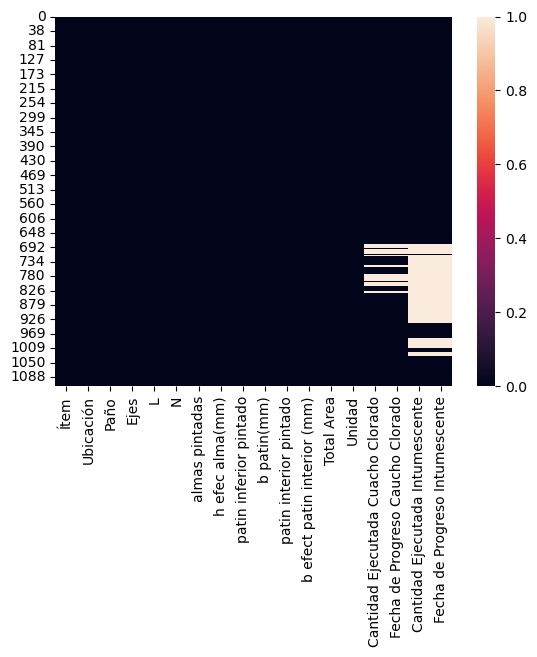

In [35]:
sns.heatmap(df_fill_na.isnull())

In [36]:
print(str(df_fill_na['Cantidad Ejecutada Cuacho Clorado'].isnull().sum()))

59


In [37]:
df_fill_na['Cantidad Ejecutada Cuacho Clorado'].describe()

count    813.000000
mean      28.769090
std       31.672605
min        0.000000
25%        9.220000
50%       16.060000
75%       31.200000
max      198.930000
Name: Cantidad Ejecutada Cuacho Clorado, dtype: float64

#### Imputatation with the meadian our continues values

In [38]:
median_caucho = df_fill_na['Cantidad Ejecutada Cuacho Clorado'].median(skipna=True)
df_fill_na['Cantidad Ejecutada Cuacho Clorado'].fillna(median_caucho, inplace=True)
median_intumescente= df_fill_na['Cantidad Ejecutada Intumescente'].median(skipna=True)
df_fill_na['Cantidad Ejecutada Intumescente'].fillna(median_intumescente, inplace=True)
df_fill_na.isnull().sum()


C:\Users\chris\AppData\Local\Temp\ipykernel_29860\589311866.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_fill_na['Cantidad Ejecutada Cuacho Clorado'].fillna(median_caucho, inplace=True)
C:\Users\chris\AppData\Local\Temp\ipykernel_29860\589311866.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values a

Ítem                                   0
Ubicación                              0
Paño                                   0
Ejes                                   0
L                                      0
N                                      0
almas pintadas                         0
h efec alma(mm)                        0
patin inferior pintado                 0
b patin(mm)                            0
patin interior pintado                 0
b efect patin interior (mm)            0
Total Area                             0
Unidad                                 0
Cantidad Ejecutada Cuacho Clorado      0
Fecha de Progreso Caucho Clorado      59
Cantidad Ejecutada Intumescente        0
Fecha de Progreso Intumescente       215
dtype: int64

In [39]:
# Sumatoria de Valores Perdidos
print("Valores perdidos : "+ str(df_fill_na['Cantidad Ejecutada Cuacho Clorado'].isnull().sum()))
print("Valores perdidos : "+ str(df_fill_na['Cantidad Ejecutada Intumescente'].isnull().sum()))

Valores perdidos : 0
Valores perdidos : 0


<Axes: >

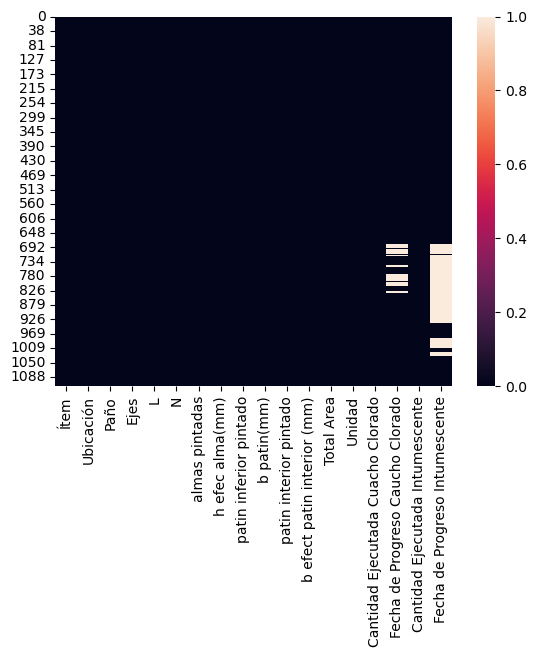

In [40]:
sns.heatmap(df_fill_na.isnull())

### Working with Duplicates

In [41]:
df_fill_na.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1108    False
1109    False
1110    False
1111    False
1112    False
Length: 872, dtype: bool

In [42]:
df_fill_na.duplicated().value_counts()

False    871
True       1
Name: count, dtype: int64

In [43]:
df_fill_na[df_fill_na.duplicated(keep=False)]

,Ítem,Ubicación,Paño,Ejes,L,N,almas pintadas,h efec alma(mm),patin inferior pintado,b patin(mm),patin interior pintado,b efect patin interior (mm),Total Area,Unidad,Cantidad Ejecutada Cuacho Clorado,Fecha de Progreso Caucho Clorado,Cantidad Ejecutada Intumescente,Fecha de Progreso Intumescente
989,B-7 I250×100×3×6,Nivel +18.00 -Bloque 4,1.0,34-34'(G-H),3.5,4.0,2.0,238,1.0,100.0,2.0,97.0,10.78,m2,10.78,2025-07-24,16.06,NaT
997,B-7 I250×100×3×6,Nivel +18.00 -Bloque 4,1.0,34-34'(G-H),3.5,4.0,2.0,238,1.0,100.0,2.0,97.0,10.78,m2,10.78,2025-07-24,16.06,NaT


In [44]:
count= df_fill_na.duplicated(df_fill_na.columns[~df_fill_na.columns.isin(["Ubicación",'Fecha Progreso Caucho Clorado'
                                                                          ,'Fecha Progreso Intumescente',
                                                                          'Cantidad Ejecutada Caucho Clorado',
                                                                         'Cantidad Ejecutada Intumescente',
                                                                         'N',
                                                                         'L',
                                                                          'Total Area','Ejes'])])
df_fill_na[df_fill_na.duplicated(df_fill_na.columns[~df_fill_na.columns.isin(["Ubicación",'Fecha Progreso Caucho Clorado'
                                                                          ,'Fecha Progreso Intumescente',
                                                                          'Cantidad Ejecutada Caucho Clorado',
                                                                         'Cantidad Ejecutada Intumescente',
                                                                         'N',
                                                                         'L',
                                                                          'Total Area','Paño',
                                                                              'Ejes'])])]


,Ítem,Ubicación,Paño,Ejes,L,N,almas pintadas,h efec alma(mm),patin inferior pintado,b patin(mm),patin interior pintado,b efect patin interior (mm),Total Area,Unidad,Cantidad Ejecutada Cuacho Clorado,Fecha de Progreso Caucho Clorado,Cantidad Ejecutada Intumescente,Fecha de Progreso Intumescente
8,VP-8 I750×220×10×15,Nivel +12.00 -Bloque 4,1.0,33-34(D),12.25,1.0,2.0,720,1.0,220.0,2.0,210.0,25.48,m2,25.48,2025-06-10,25.48,2025-06-23
9,VP-8 I750×220×10×15,Nivel +12.00 -Bloque 4,1.0,33(D-E),9.3,1.0,2.0,720,1.0,220.0,2.0,210.0,19.34,m2,19.34,2025-06-10,19.34,2025-06-23
10,VP-8 I750×220×10×15,Nivel +12.00 -Bloque 4,1.0,34(D-E),9.3,1.0,2.0,720,1.0,220.0,2.0,210.0,19.34,m2,19.34,2025-06-10,19.34,2025-06-23
12,VP-8 I750×220×10×15,Nivel +12.00 -Bloque 4,1.0,33-34(E),12.25,1.0,2.0,720,1.0,220.0,2.0,210.0,25.48,m2,25.48,2025-06-10,25.48,2025-06-23
40,VP-1 I500×200×8×12,Nivel +12.00 -Bloque 4,1.0,34-34'(H),1.68,1.0,1.0,476,0.0,200.0,1.0,192.0,1.12,m2,1.12,2025-06-12,1.12,2025-06-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1069,VP-20 I650×350×15×15,Nivel +23.52 -Bloque 1,6.0,D-D'(3),2.4,1.0,2.0,620,1.0,350.0,2.0,335.0,5.42,m2,5.42,2025-07-09,5.42,2025-07-21
1070,VP-1 I500×200×8×12,Nivel +23.52 -Bloque 1,6.0,3-4(D' ),9.55,1.0,2.0,476,1.0,200.0,2.0,192.0,14.67,m2,14.67,2025-07-09,14.67,2025-07-21
1072,B-1 I500×200×6×8,Nivel +23.52 -Bloque 1,6.0,3-4(D-D'),10,1.0,2.0,484,1.0,200.0,2.0,194.0,15.56,m2,15.56,2025-07-09,15.56,2025-07-21
1088,VP-1 I500×200×8×12,Nivel +23.52 -Bloque 1,8.0,1'-1(D ),1.05,1.0,2.0,476,1.0,200.0,2.0,192.0,1.61,m2,1.61,2025-07-10,1.61,2025-07-16


In [45]:
count.value_counts()

False    725
True     147
Name: count, dtype: int64

In [46]:
df_fill_na.duplicated(keep=False)

0       False
1       False
2       False
3       False
4       False
        ...  
1108    False
1109    False
1110    False
1111    False
1112    False
Length: 872, dtype: bool

In [47]:
df_fill_na.drop_duplicates(keep='first',inplace=True)
df_fill_na.info()

<class 'pandas.core.frame.DataFrame'>
Index: 871 entries, 0 to 1112
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Ítem                               871 non-null    object        
 1   Ubicación                          871 non-null    object        
 2   Paño                               871 non-null    float64       
 3   Ejes                               871 non-null    object        
 4   L                                  871 non-null    object        
 5   N                                  871 non-null    float64       
 6   almas pintadas                     871 non-null    float64       
 7   h efec alma(mm)                    871 non-null    object        
 8   patin inferior pintado             871 non-null    float64       
 9   b patin(mm)                        871 non-null    float64       
 10  patin interior pintado             871 non

In [48]:
df_fill_na[df_fill_na.duplicated(['N', 'Ítem','Paño','L'])]

,Ítem,Ubicación,Paño,Ejes,L,N,almas pintadas,h efec alma(mm),patin inferior pintado,b patin(mm),patin interior pintado,b efect patin interior (mm),Total Area,Unidad,Cantidad Ejecutada Cuacho Clorado,Fecha de Progreso Caucho Clorado,Cantidad Ejecutada Intumescente,Fecha de Progreso Intumescente
3,VP-8 I750×220×10×15,Nivel +12.00 -Bloque 4,1.0,34(C-D),9.3,1.0,1.0,720,1.0,220.0,1.0,210.0,10.70,m2,10.70,2025-06-10,10.70,2025-06-23
8,VP-8 I750×220×10×15,Nivel +12.00 -Bloque 4,1.0,33-34(D),12.25,1.0,2.0,720,1.0,220.0,2.0,210.0,25.48,m2,25.48,2025-06-10,25.48,2025-06-23
9,VP-8 I750×220×10×15,Nivel +12.00 -Bloque 4,1.0,33(D-E),9.3,1.0,2.0,720,1.0,220.0,2.0,210.0,19.34,m2,19.34,2025-06-10,19.34,2025-06-23
10,VP-8 I750×220×10×15,Nivel +12.00 -Bloque 4,1.0,34(D-E),9.3,1.0,2.0,720,1.0,220.0,2.0,210.0,19.34,m2,19.34,2025-06-10,19.34,2025-06-23
12,VP-8 I750×220×10×15,Nivel +12.00 -Bloque 4,1.0,33-34(E),12.25,1.0,2.0,720,1.0,220.0,2.0,210.0,25.48,m2,25.48,2025-06-10,25.48,2025-06-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1102,VP-1 I500×200×8×12,Nivel +23.52 -Bloque 1,8.0,1-2( F),8.48,1.0,2.0,476,1.0,200.0,2.0,192.0,13.03,m2,13.03,2025-07-15,13.03,2025-07-16
1104,VP-1 I500×200×8×12,Nivel +23.52 -Bloque 1,8.0,1'-1( F),1,1.0,2.0,476,1.0,200.0,2.0,192.0,1.54,m2,1.54,2025-07-15,1.54,2025-07-22
1109,VP-8 I750×220×10×15,Nivel +23.52 -Bloque 1,8.0,2(F-G),6.3,1.0,2.0,720,1.0,220.0,2.0,210.0,13.10,m2,13.10,2025-07-14,13.10,2025-07-16
1110,VP-1 I500×200×8×12,Nivel +23.52 -Bloque 1,8.0,1'(F-G),6.7,1.0,2.0,476,1.0,200.0,2.0,192.0,10.29,m2,10.29,2025-07-14,10.29,2025-07-22


#### TRATAMIENTO DE OUTLIERS , CODIFICACIÓN Y TRANSFORMACIÓN


In [49]:
from sklearn.preprocessing import OrdinalEncoder
from category_encoders import BinaryEncoder
from category_encoders import HashingEncoder

In [50]:
df_fill_na['Ítem'].value_counts()

Ítem
VP-1 I500×200×8×12                        189
B-3 I550×200×8×10                         151
VP-4 I600×200×8×12                        109
VP-8 I750×220×10×15                        73
VP-3 I550×200×8×12                         45
VP-6 I800×200×10×15                        42
B-1 I500×200×6×8                           38
B-5 I550×150×8×10                          36
VP-5 I700×200×8×15                         36
VP-2 I650×200×8×15                         26
B-7 I250×100×3×6                           18
B-4 I750×250×8×12                          17
VP-15 I1000×250×12×15                      16
VP-11E (VP-11C) I900×270×12×20(10×15)      14
B-6 I750×200×8×12                          14
VP-7 I900×250×12×15                        13
VP-10E (VP-10C) I1100×270×15×20(15×15)     11
VP-9 I850×220×10×15                        11
VP-20 I650×350×15×15                        5
B-2 I650×250×6×10                           3
VP-18 I800×200×10×15                        2
VP-10C I1100×270×15×15       

In [51]:
beams=df_fill_na['Ítem'].unique()
beams=beams.tolist()
beams

['VP-14 I1100×350×15×20',
 'VP-8 I750×220×10×15',
 'VP-1 I500×200×8×12',
 'B-6 I750×200×8×12',
 'VP-4 I600×200×8×12',
 'B-7 I250×100×3×6',
 'VP-10C I1100×270×15×15',
 'VP-15 I1000×250×12×15',
 'VP-9 I850×220×10×15',
 'VP-7 I900×250×12×15',
 'VP-18 I800×200×10×15',
 'B-5 I550×150×8×10',
 'VP-5 I700×200×8×15',
 'VP-2 I650×200×8×15',
 'VP-10E (VP-10C) I1100×270×15×20(15×15)',
 'VP-6 I800×200×10×15',
 'B-4 I750×250×8×12',
 'VP-11E (VP-11C) I900×270×12×20(10×15)',
 'B-3 I550×200×8×10',
 'VP-3 I550×200×8×12',
 'B-1 I500×200×6×8',
 'B-2 I650×250×6×10',
 'VP-20 I650×350×15×15']

In [52]:
#Creating the codificador after separating my categories

In [53]:
encoder= OrdinalEncoder(categories=[beams])

In [54]:
#training the model
encoder.fit(df_fill_na[['Ítem']])
df_fill_na['beams-endcoded']= encoder.transform(df_fill_na[['Ítem']])

In [55]:
#df_fill_na[['Ítems', 'beams-encoded']].head()

In [56]:
df_fill_na['Ítem'].value_counts().sort_index()

Ítem
B-1 I500×200×6×8                           38
B-2 I650×250×6×10                           3
B-3 I550×200×8×10                         151
B-4 I750×250×8×12                          17
B-5 I550×150×8×10                          36
B-6 I750×200×8×12                          14
B-7 I250×100×3×6                           18
VP-1 I500×200×8×12                        189
VP-10C I1100×270×15×15                      1
VP-10E (VP-10C) I1100×270×15×20(15×15)     11
VP-11E (VP-11C) I900×270×12×20(10×15)      14
VP-14 I1100×350×15×20                       1
VP-15 I1000×250×12×15                      16
VP-18 I800×200×10×15                        2
VP-2 I650×200×8×15                         26
VP-20 I650×350×15×15                        5
VP-3 I550×200×8×12                         45
VP-4 I600×200×8×12                        109
VP-5 I700×200×8×15                         36
VP-6 I800×200×10×15                        42
VP-7 I900×250×12×15                        13
VP-8 I750×220×10×15          

In [57]:
df_fill_na.info()

<class 'pandas.core.frame.DataFrame'>
Index: 871 entries, 0 to 1112
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Ítem                               871 non-null    object        
 1   Ubicación                          871 non-null    object        
 2   Paño                               871 non-null    float64       
 3   Ejes                               871 non-null    object        
 4   L                                  871 non-null    object        
 5   N                                  871 non-null    float64       
 6   almas pintadas                     871 non-null    float64       
 7   h efec alma(mm)                    871 non-null    object        
 8   patin inferior pintado             871 non-null    float64       
 9   b patin(mm)                        871 non-null    float64       
 10  patin interior pintado             871 non

In [58]:
df_fill_na.Ítem.value_counts()
dummies=pd.get_dummies(df_fill_na['Ítem'],drop_first=True,dtype=int)
dummies

,B-2 I650×250×6×10,B-3 I550×200×8×10,B-4 I750×250×8×12,B-5 I550×150×8×10,B-6 I750×200×8×12,B-7 I250×100×3×6,VP-1 I500×200×8×12,VP-10C I1100×270×15×15,VP-10E (VP-10C) I1100×270×15×20(15×15),VP-11E (VP-11C) I900×270×12×20(10×15),...,VP-18 I800×200×10×15,VP-2 I650×200×8×15,VP-20 I650×350×15×15,VP-3 I550×200×8×12,VP-4 I600×200×8×12,VP-5 I700×200×8×15,VP-6 I800×200×10×15,VP-7 I900×250×12×15,VP-8 I750×220×10×15,VP-9 I850×220×10×15
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1108,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1109,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1110,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1111,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
df_fill_na.describe()

,Paño,N,almas pintadas,patin inferior pintado,b patin(mm),patin interior pintado,b efect patin interior (mm),Total Area,Cantidad Ejecutada Cuacho Clorado,Fecha de Progreso Caucho Clorado,Cantidad Ejecutada Intumescente,Fecha de Progreso Intumescente,beams-endcoded
count,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,812,871.000000,657,871.000000
mean,3.787600,1.943169,1.864524,0.934558,203.846154,1.865672,195.407577,29.167956,27.928852,2025-07-03 06:42:33.694581504,25.664707,2025-07-06 17:53:58.356164352,9.561424
min,1.000000,0.000000,1.000000,0.000000,100.000000,1.000000,97.000000,0.000000,0.000000,2025-06-10 00:00:00,0.500000,2025-06-23 00:00:00,0.000000
25%,2.000000,1.000000,2.000000,1.000000,200.000000,2.000000,192.000000,9.750000,9.905000,2025-06-25 00:00:00,13.210000,2025-06-27 00:00:00,2.000000
50%,3.000000,1.000000,2.000000,1.000000,200.000000,2.000000,192.000000,16.060000,16.060000,2025-07-02 00:00:00,16.060000,2025-07-05 00:00:00,9.000000
75%,5.000000,2.000000,2.000000,1.000000,200.000000,2.000000,192.000000,32.880000,28.390000,2025-07-14 00:00:00,23.690000,2025-07-16 00:00:00,18.000000
max,10.000000,8.000000,2.000000,1.000000,350.000000,2.000000,335.000000,198.930000,198.930000,2025-07-24 00:00:00,198.930000,2025-07-24 00:00:00,22.000000
std,2.477881,1.757557,0.342428,0.240378,27.969922,0.341201,26.647169,32.059317,30.759583,NaN,28.593244,NaN,7.139695


In [60]:
from sklearn.preprocessing import MinMaxScaler

In [61]:
scaler=MinMaxScaler()

In [62]:
total_area_normalized= scaler.fit_transform(df_fill_na[['Total Area']])
total_l_normalized= scaler.fit_transform(df_fill_na[['L']])


In [63]:
print(total_l_normalized)


[[0.22193548]
 [0.75806452]
 [0.56774194]
 [0.56774194]
 [0.09032258]
 [0.21935484]
 [0.80645161]
 [0.75806452]
 [0.56774194]
 [0.56774194]
 [0.61290323]
 [0.75806452]
 [0.06774194]
 [0.80645161]
 [0.09032258]
 [0.9516129 ]
 [0.9516129 ]
 [0.75806452]
 [0.06774194]
 [1.        ]
 [0.80645161]
 [0.09032258]
 [0.77096774]
 [0.09032258]
 [0.21935484]
 [0.77096774]
 [0.37419355]
 [0.09096774]
 [0.75806452]
 [0.07612903]
 [0.80645161]
 [0.09032258]
 [0.50645161]
 [0.50645161]
 [0.5483871 ]
 [0.76774194]
 [0.07612903]
 [0.80645161]
 [0.09290323]
 [0.50645161]
 [0.50645161]
 [0.5483871 ]
 [0.07612903]
 [0.80645161]
 [0.32903226]
 [0.29032258]
 [0.09290323]
 [0.1483871 ]
 [0.30967742]
 [0.61290323]
 [0.56774194]
 [0.56774194]
 [0.56774194]
 [0.61290323]
 [0.56645161]
 [0.56451613]
 [0.61290323]
 [0.9516129 ]
 [0.56451613]
 [0.61290323]
 [0.77096774]
 [0.56451613]
 [0.61290323]
 [0.50645161]
 [0.56774194]
 [0.61290323]
 [0.50967742]
 [0.61290323]
 [0.61290323]
 [0.56774194]
 [0.56774194]
 [0.56

### LOC AND ILOC

In [64]:


df_m4= df_fill_na
df_m4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 871 entries, 0 to 1112
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Ítem                               871 non-null    object        
 1   Ubicación                          871 non-null    object        
 2   Paño                               871 non-null    float64       
 3   Ejes                               871 non-null    object        
 4   L                                  871 non-null    object        
 5   N                                  871 non-null    float64       
 6   almas pintadas                     871 non-null    float64       
 7   h efec alma(mm)                    871 non-null    object        
 8   patin inferior pintado             871 non-null    float64       
 9   b patin(mm)                        871 non-null    float64       
 10  patin interior pintado             871 non

In [65]:
df_m4['Ítem'].unique()

array(['VP-14 I1100×350×15×20', 'VP-8 I750×220×10×15',
       'VP-1 I500×200×8×12', 'B-6 I750×200×8×12', 'VP-4 I600×200×8×12',
       'B-7 I250×100×3×6', 'VP-10C I1100×270×15×15',
       'VP-15 I1000×250×12×15', 'VP-9 I850×220×10×15',
       'VP-7 I900×250×12×15', 'VP-18 I800×200×10×15', 'B-5 I550×150×8×10',
       'VP-5 I700×200×8×15', 'VP-2 I650×200×8×15',
       'VP-10E (VP-10C) I1100×270×15×20(15×15)', 'VP-6 I800×200×10×15',
       'B-4 I750×250×8×12', 'VP-11E (VP-11C) I900×270×12×20(10×15)',
       'B-3 I550×200×8×10', 'VP-3 I550×200×8×12', 'B-1 I500×200×6×8',
       'B-2 I650×250×6×10', 'VP-20 I650×350×15×15'], dtype=object)

In [66]:
df_m4.set_index('Ítem', inplace=True, drop=False)

In [67]:
df_m4

,Ítem,Ubicación,Paño,Ejes,L,N,almas pintadas,h efec alma(mm),patin inferior pintado,b patin(mm),patin interior pintado,b efect patin interior (mm),Total Area,Unidad,Cantidad Ejecutada Cuacho Clorado,Fecha de Progreso Caucho Clorado,Cantidad Ejecutada Intumescente,Fecha de Progreso Intumescente,beams-endcoded
Ítem,,,,,,,,,,,,,,,,,,,
VP-14 I1100×350×15×20,VP-14 I1100×350×15×20,Nivel +12.00 -Bloque 4,1.0,"34(B-C),33(B-C)",3.94,2.0,1.0,1060,1.0,350.0,1.0,335.0,13.75,m2,13.75,2025-06-10,13.75,2025-06-23,0.0
VP-8 I750×220×10×15,VP-8 I750×220×10×15,Nivel +12.00 -Bloque 4,1.0,33-34(C ),12.25,1.0,2.0,720,1.0,220.0,2.0,210.0,25.48,m2,25.48,2025-06-10,25.48,2025-06-23,1.0
VP-8 I750×220×10×15,VP-8 I750×220×10×15,Nivel +12.00 -Bloque 4,1.0,33(C-D),9.3,1.0,2.0,720,1.0,220.0,2.0,210.0,19.34,m2,19.34,2025-06-10,19.34,2025-06-23,1.0
VP-8 I750×220×10×15,VP-8 I750×220×10×15,Nivel +12.00 -Bloque 4,1.0,34(C-D),9.3,1.0,1.0,720,1.0,220.0,1.0,210.0,10.70,m2,10.70,2025-06-10,10.70,2025-06-23,1.0
VP-1 I500×200×8×12,VP-1 I500×200×8×12,Nivel +12.00 -Bloque 4,1.0,33-34(C-D)(1),1.9,1.0,2.0,476,1.0,200.0,2.0,192.0,2.92,m2,2.92,2025-06-10,2.92,2025-06-23,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VP-8 I750×220×10×15,VP-8 I750×220×10×15,Nivel +23.52 -Bloque 1,8.0,1(F-G),6.3,1.0,2.0,720,1.0,220.0,2.0,210.0,13.10,m2,13.10,2025-07-14,13.10,2025-07-21,1.0
VP-8 I750×220×10×15,VP-8 I750×220×10×15,Nivel +23.52 -Bloque 1,8.0,2(F-G),6.3,1.0,2.0,720,1.0,220.0,2.0,210.0,13.10,m2,13.10,2025-07-14,13.10,2025-07-16,1.0
VP-1 I500×200×8×12,VP-1 I500×200×8×12,Nivel +23.52 -Bloque 1,8.0,1'(F-G),6.7,1.0,2.0,476,1.0,200.0,2.0,192.0,10.29,m2,10.29,2025-07-14,10.29,2025-07-22,2.0


In [68]:
df_m4.loc[['B-1 I500×200×6×8','VP-1 I500×200×8×12']]

,Ítem,Ubicación,Paño,Ejes,L,N,almas pintadas,h efec alma(mm),patin inferior pintado,b patin(mm),patin interior pintado,b efect patin interior (mm),Total Area,Unidad,Cantidad Ejecutada Cuacho Clorado,Fecha de Progreso Caucho Clorado,Cantidad Ejecutada Intumescente,Fecha de Progreso Intumescente,beams-endcoded
Ítem,,,,,,,,,,,,,,,,,,,
B-1 I500×200×6×8,B-1 I500×200×6×8,Nivel +18.00 -Bloque 1,2.0,7-8(C-D),10,4.0,2.0,484,1.0,200.0,2.0,194.0,62.24,m2,62.24,2025-07-09,62.24,2025-07-14,20.0
B-1 I500×200×6×8,B-1 I500×200×6×8,Nivel +18.00 -Bloque 1,3.0,4-5(C-D),10,4.0,2.0,484,1.0,200.0,2.0,194.0,62.24,m2,62.24,2025-07-10,62.24,2025-07-14,20.0
B-1 I500×200×6×8,B-1 I500×200×6×8,Nivel +18.00 -Bloque 1,4.0,5-6(C-D),10,4.0,2.0,484,1.0,200.0,2.0,194.0,62.24,m2,62.24,2025-07-10,62.24,2025-07-14,20.0
B-1 I500×200×6×8,B-1 I500×200×6×8,Nivel +18.00 -Bloque 1,5.0,4-5(C-D),10,4.0,2.0,484,1.0,200.0,2.0,194.0,62.24,m2,62.24,2025-07-11,62.24,2025-07-15,20.0
B-1 I500×200×6×8,B-1 I500×200×6×8,Nivel +18.00 -Bloque 1,6.0,3-4(C-D),10,4.0,2.0,484,1.0,200.0,2.0,194.0,62.24,m2,62.24,2025-07-12,62.24,2025-07-15,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VP-1 I500×200×8×12,VP-1 I500×200×8×12,Nivel +23.52 -Bloque 1,8.0,1'(D-E),10,1.0,2.0,476,1.0,200.0,2.0,192.0,15.36,m2,15.36,2025-07-10,15.36,2025-07-22,2.0
VP-1 I500×200×8×12,VP-1 I500×200×8×12,Nivel +23.52 -Bloque 1,8.0,1-2( F),8.48,1.0,2.0,476,1.0,200.0,2.0,192.0,13.03,m2,13.03,2025-07-15,13.03,2025-07-16,2.0
VP-1 I500×200×8×12,VP-1 I500×200×8×12,Nivel +23.52 -Bloque 1,8.0,1'(E-F),16,1.0,2.0,476,1.0,200.0,2.0,192.0,24.58,m2,24.58,2025-07-15,24.58,2025-07-22,2.0


In [69]:
df_m4.loc[(df_m4.Ubicación=='Nivel +18.00 -Bloque 1')].head(20)

,Ítem,Ubicación,Paño,Ejes,L,N,almas pintadas,h efec alma(mm),patin inferior pintado,b patin(mm),patin interior pintado,b efect patin interior (mm),Total Area,Unidad,Cantidad Ejecutada Cuacho Clorado,Fecha de Progreso Caucho Clorado,Cantidad Ejecutada Intumescente,Fecha de Progreso Intumescente,beams-endcoded
Ítem,,,,,,,,,,,,,,,,,,,
VP-1 I500×200×8×12,VP-1 I500×200×8×12,Nivel +18.00 -Bloque 1,2.0,7-8(C ),9.4,1.0,2.0,476,1.0,200.0,2.0,192.0,14.44,m2,14.44,2025-07-09,14.44,2025-07-14,2.0
VP-6 I800×200×10×15,VP-6 I800×200×10×15,Nivel +18.00 -Bloque 1,2.0,C-D(8),9.4,1.0,1.0,770,0.0,200.0,1.0,190.0,9.02,m2,9.02,2025-07-09,9.02,2025-07-14,15.0
VP-6 I800×200×10×15,VP-6 I800×200×10×15,Nivel +18.00 -Bloque 1,2.0,C-D(7),9.4,1.0,1.0,770,1.0,200.0,1.0,190.0,10.90,m2,10.90,2025-07-09,10.90,2025-07-14,15.0
VP-1 I500×200×8×12,VP-1 I500×200×8×12,Nivel +18.00 -Bloque 1,2.0,7-8(D),9.4,1.0,2.0,476,1.0,200.0,2.0,192.0,14.44,m2,14.44,2025-07-09,14.44,2025-07-14,2.0
B-1 I500×200×6×8,B-1 I500×200×6×8,Nivel +18.00 -Bloque 1,2.0,7-8(C-D),10,4.0,2.0,484,1.0,200.0,2.0,194.0,62.24,m2,62.24,2025-07-09,62.24,2025-07-14,20.0
VP-1 I500×200×8×12,VP-1 I500×200×8×12,Nivel +18.00 -Bloque 1,3.0,4-5(C ),9.4,1.0,2.0,476,1.0,200.0,2.0,192.0,14.44,m2,14.44,2025-07-10,14.44,2025-07-14,2.0
VP-7 I900×250×12×15,VP-7 I900×250×12×15,Nivel +18.00 -Bloque 1,3.0,C-D(6),9.4,1.0,1.0,870,0.0,250.0,1.0,238.0,10.42,m2,10.42,2025-07-10,10.42,2025-07-14,9.0
VP-1 I500×200×8×12,VP-1 I500×200×8×12,Nivel +18.00 -Bloque 1,3.0,4-5(D),9.4,1.0,2.0,476,1.0,200.0,2.0,192.0,14.44,m2,14.44,2025-07-10,14.44,2025-07-14,2.0
B-1 I500×200×6×8,B-1 I500×200×6×8,Nivel +18.00 -Bloque 1,3.0,4-5(C-D),10,4.0,2.0,484,1.0,200.0,2.0,194.0,62.24,m2,62.24,2025-07-10,62.24,2025-07-14,20.0


In [70]:
df_m4.iloc[[0]]

,Ítem,Ubicación,Paño,Ejes,L,N,almas pintadas,h efec alma(mm),patin inferior pintado,b patin(mm),patin interior pintado,b efect patin interior (mm),Total Area,Unidad,Cantidad Ejecutada Cuacho Clorado,Fecha de Progreso Caucho Clorado,Cantidad Ejecutada Intumescente,Fecha de Progreso Intumescente,beams-endcoded
Ítem,,,,,,,,,,,,,,,,,,,
VP-14 I1100×350×15×20,VP-14 I1100×350×15×20,Nivel +12.00 -Bloque 4,1.0,"34(B-C),33(B-C)",3.94,2.0,1.0,1060,1.0,350.0,1.0,335.0,13.75,m2,13.75,2025-06-10,13.75,2025-06-23,0.0


In [71]:
df_m4.iloc[:3,[0,1,2,3,4]]

,Ítem,Ubicación,Paño,Ejes,L
Ítem,,,,,
VP-14 I1100×350×15×20,VP-14 I1100×350×15×20,Nivel +12.00 -Bloque 4,1.0,"34(B-C),33(B-C)",3.94
VP-8 I750×220×10×15,VP-8 I750×220×10×15,Nivel +12.00 -Bloque 4,1.0,33-34(C ),12.25
VP-8 I750×220×10×15,VP-8 I750×220×10×15,Nivel +12.00 -Bloque 4,1.0,33(C-D),9.3


In [72]:
df_m4.iloc[:,[1,2]]

,Ubicación,Paño
Ítem,,
VP-14 I1100×350×15×20,Nivel +12.00 -Bloque 4,1.0
VP-8 I750×220×10×15,Nivel +12.00 -Bloque 4,1.0
VP-8 I750×220×10×15,Nivel +12.00 -Bloque 4,1.0
VP-8 I750×220×10×15,Nivel +12.00 -Bloque 4,1.0
VP-1 I500×200×8×12,Nivel +12.00 -Bloque 4,1.0
...,...,...
VP-8 I750×220×10×15,Nivel +23.52 -Bloque 1,8.0
VP-8 I750×220×10×15,Nivel +23.52 -Bloque 1,8.0
VP-1 I500×200×8×12,Nivel +23.52 -Bloque 1,8.0


In [73]:
df_m4['Ítem']== 'Pepa'

Ítem
VP-14 I1100×350×15×20    False
VP-8 I750×220×10×15      False
VP-8 I750×220×10×15      False
VP-8 I750×220×10×15      False
VP-1 I500×200×8×12       False
                         ...  
VP-8 I750×220×10×15      False
VP-8 I750×220×10×15      False
VP-1 I500×200×8×12       False
B-1 I500×200×6×8         False
B-1 I500×200×6×8         False
Name: Ítem, Length: 871, dtype: bool

### Conditions

In [74]:
c1=df_m4['Ítem']=='VP-14 I1100×350×15×20'
c2=df_m4['Ubicación']=='Nivel +12.00 -Bloque 4'
df_m4[c1 & c2]

,Ítem,Ubicación,Paño,Ejes,L,N,almas pintadas,h efec alma(mm),patin inferior pintado,b patin(mm),patin interior pintado,b efect patin interior (mm),Total Area,Unidad,Cantidad Ejecutada Cuacho Clorado,Fecha de Progreso Caucho Clorado,Cantidad Ejecutada Intumescente,Fecha de Progreso Intumescente,beams-endcoded
Ítem,,,,,,,,,,,,,,,,,,,
VP-14 I1100×350×15×20,VP-14 I1100×350×15×20,Nivel +12.00 -Bloque 4,1.0,"34(B-C),33(B-C)",3.94,2.0,1.0,1060,1.0,350.0,1.0,335.0,13.75,m2,13.75,2025-06-10,13.75,2025-06-23,0.0


In [75]:
###  WHERE and QUERY


In [76]:
df_m4.where(df_m4['Ítem']=='VP-14 I1100×350×15×20', other='pepa')

,Ítem,Ubicación,Paño,Ejes,L,N,almas pintadas,h efec alma(mm),patin inferior pintado,b patin(mm),patin interior pintado,b efect patin interior (mm),Total Area,Unidad,Cantidad Ejecutada Cuacho Clorado,Fecha de Progreso Caucho Clorado,Cantidad Ejecutada Intumescente,Fecha de Progreso Intumescente,beams-endcoded
Ítem,,,,,,,,,,,,,,,,,,,
VP-14 I1100×350×15×20,VP-14 I1100×350×15×20,Nivel +12.00 -Bloque 4,1.0,"34(B-C),33(B-C)",3.94,2.0,1.0,1060,1.0,350.0,1.0,335.0,13.75,m2,13.75,2025-06-10 00:00:00,13.75,2025-06-23 00:00:00,0.0
VP-8 I750×220×10×15,pepa,pepa,pepa,pepa,pepa,pepa,pepa,pepa,pepa,pepa,pepa,pepa,pepa,pepa,pepa,pepa,pepa,pepa,pepa
VP-8 I750×220×10×15,pepa,pepa,pepa,pepa,pepa,pepa,pepa,pepa,pepa,pepa,pepa,pepa,pepa,pepa,pepa,pepa,pepa,pepa,pepa
VP-8 I750×220×10×15,pepa,pepa,pepa,pepa,pepa,pepa,pepa,pepa,pepa,pepa,pepa,pepa,pepa,pepa,pepa,pepa,pepa,pepa,pepa
VP-1 I500×200×8×12,pepa,pepa,pepa,pepa,pepa,pepa,pepa,pepa,pepa,pepa,pepa,pepa,pepa,pepa,pepa,pepa,pepa,pepa,pepa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VP-8 I750×220×10×15,pepa,pepa,pepa,pepa,pepa,pepa,pepa,pepa,pepa,pepa,pepa,pepa,pepa,pepa,pepa,pepa,pepa,pepa,pepa
VP-8 I750×220×10×15,pepa,pepa,pepa,pepa,pepa,pepa,pepa,pepa,pepa,pepa,pepa,pepa,pepa,pepa,pepa,pepa,pepa,pepa,pepa
VP-1 I500×200×8×12,pepa,pepa,pepa,pepa,pepa,pepa,pepa,pepa,pepa,pepa,pepa,pepa,pepa,pepa,pepa,pepa,pepa,pepa,pepa


In [77]:
df_m4.query('Ítem == "VP-14 I1100×350×15×20"')


,Ítem,Ubicación,Paño,Ejes,L,N,almas pintadas,h efec alma(mm),patin inferior pintado,b patin(mm),patin interior pintado,b efect patin interior (mm),Total Area,Unidad,Cantidad Ejecutada Cuacho Clorado,Fecha de Progreso Caucho Clorado,Cantidad Ejecutada Intumescente,Fecha de Progreso Intumescente,beams-endcoded
Ítem,,,,,,,,,,,,,,,,,,,
VP-14 I1100×350×15×20,VP-14 I1100×350×15×20,Nivel +12.00 -Bloque 4,1.0,"34(B-C),33(B-C)",3.94,2.0,1.0,1060,1.0,350.0,1.0,335.0,13.75,m2,13.75,2025-06-10,13.75,2025-06-23,0.0


In [78]:
condition=df_m4['Ubicación'].str.contains("6",na=False, case= False)
df_m4[condition]

,Ítem,Ubicación,Paño,Ejes,L,N,almas pintadas,h efec alma(mm),patin inferior pintado,b patin(mm),patin interior pintado,b efect patin interior (mm),Total Area,Unidad,Cantidad Ejecutada Cuacho Clorado,Fecha de Progreso Caucho Clorado,Cantidad Ejecutada Intumescente,Fecha de Progreso Intumescente,beams-endcoded
Ítem,,,,,,,,,,,,,,,,,,,
VP-8 I750×220×10×15,VP-8 I750×220×10×15,Nivel +6.00 -Bloque 4,1.0,33-34(B-C)(1),10.5,1.0,1.0,720,0.0,220.0,1.0,210.0,9.77,m2,9.77,2025-06-18,9.77,2025-06-27,1.0
VP-8 I750×220×10×15,VP-8 I750×220×10×15,Nivel +6.00 -Bloque 4,1.0,33-34(B-C)(2),4.6,1.0,1.0,720,0.0,220.0,1.0,210.0,4.28,m2,4.28,2025-06-18,4.28,2025-06-27,1.0
VP-8 I750×220×10×15,VP-8 I750×220×10×15,Nivel +6.00 -Bloque 4,1.0,33(B-C),6.35,1.0,2.0,720,1.0,220.0,2.0,210.0,13.21,m2,13.21,2025-06-18,13.21,2025-06-27,1.0
VP-8 I750×220×10×15,VP-8 I750×220×10×15,Nivel +6.00 -Bloque 4,1.0,33-34(C),12.3,1.0,2.0,720,1.0,220.0,2.0,210.0,25.58,m2,25.58,2025-06-18,25.58,2025-06-27,1.0
B-4 I750×250×8×12,B-4 I750×250×8×12,Nivel +6.00 -Bloque 4,1.0,33-34(B-C),13,1.0,2.0,726,1.0,250.0,2.0,242.0,28.42,m2,28.42,2025-06-18,28.42,2025-06-27,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B-3 I550×200×8×10,B-3 I550×200×8×10,Nivel +6.00 -Bloque 4,6.0,28'-29(G-H)(3),3.7,1.0,2.0,530,1.0,200.0,2.0,192.0,6.08,m2,6.08,2025-07-03,6.08,2025-07-04,18.0
B-3 I550×200×8×10,B-3 I550×200×8×10,Nivel +6.00 -Bloque 4,6.0,28'-29(G-H)(4),3.7,1.0,2.0,530,1.0,200.0,2.0,192.0,6.08,m2,6.08,2025-07-03,6.08,2025-07-04,18.0
B-3 I550×200×8×10,B-3 I550×200×8×10,Nivel +6.00 -Bloque 4,6.0,28'-29(G-H)(5),2.7,1.0,1.0,530,0.0,200.0,1.0,192.0,1.95,m2,1.95,2025-07-03,1.95,2025-07-04,18.0


In [79]:
condition=df_m4['Fecha de Progreso Caucho Clorado'].between("2025-07-01","2025-07-01")
df_m4[condition]

,Ítem,Ubicación,Paño,Ejes,L,N,almas pintadas,h efec alma(mm),patin inferior pintado,b patin(mm),patin interior pintado,b efect patin interior (mm),Total Area,Unidad,Cantidad Ejecutada Cuacho Clorado,Fecha de Progreso Caucho Clorado,Cantidad Ejecutada Intumescente,Fecha de Progreso Intumescente,beams-endcoded
Ítem,,,,,,,,,,,,,,,,,,,
VP-8 I750×220×10×15,VP-8 I750×220×10×15,Nivel +6.00 -Bloque 4,1.0,"33(G-H), 34(G-H)",8.33,2.0,2.0,720,1.0,220.0,2.0,210.0,34.65,m2,34.65,2025-07-01,34.65,2025-07-05,1.0
VP-1 I500×200×8×12,VP-1 I500×200×8×12,Nivel +6.00 -Bloque 4,1.0,34'(G-H),9,1.0,1.0,476,0.0,200.0,1.0,192.0,6.01,m2,6.01,2025-07-01,6.01,2025-07-05,2.0
VP-8 I750×220×10×15,VP-8 I750×220×10×15,Nivel +6.00 -Bloque 4,1.0,33-34(H),12.5,1.0,2.0,720,0.0,220.0,2.0,210.0,23.25,m2,23.25,2025-07-01,23.25,2025-07-05,1.0
VP-1 I500×200×8×12,VP-1 I500×200×8×12,Nivel +6.00 -Bloque 4,1.0,34-34'(H),1.68,1.0,2.0,476,1.0,200.0,2.0,192.0,2.58,m2,2.58,2025-07-01,2.58,2025-07-05,2.0
B-4 I750×250×8×12,B-4 I750×250×8×12,Nivel +6.00 -Bloque 4,1.0,33-34(G-H),13,4.0,2.0,726,1.0,250.0,2.0,242.0,113.67,m2,113.67,2025-07-01,113.67,2025-07-05,16.0
B-7 I250×100×3×6,B-7 I250×100×3×6,Nivel +6.00 -Bloque 4,1.0,34-34'(G-H),1.7,4.0,2.0,238,1.0,100.0,2.0,97.0,5.24,m2,5.24,2025-07-01,5.24,2025-07-05,5.0
VP-8 I750×220×10×15,VP-8 I750×220×10×15,Nivel +6.00 -Bloque 4,4.0,30(D-E),9.3,1.0,2.0,720,1.0,220.0,2.0,210.0,19.34,m2,19.34,2025-07-01,19.34,2025-07-02,1.0
VP-5 I700×200×8×15,VP-5 I700×200×8×15,Nivel +6.00 -Bloque 4,4.0,30-31(E ),9.25,1.0,2.0,670,1.0,200.0,2.0,192.0,17.80,m2,17.80,2025-07-01,17.80,2025-07-02,12.0
B-3 I550×200×8×10,B-3 I550×200×8×10,Nivel +6.00 -Bloque 4,4.0,30-31(D-E),10,4.0,2.0,530,1.0,200.0,2.0,192.0,65.76,m2,65.76,2025-07-01,65.76,2025-07-02,18.0


### Métodos de Filtrado


In [80]:
from sklearn.feature_selection import SelectKBest, f_classif, f_regression, chi2



In [81]:
df_0.info()
X= df_0.iloc[:,[2,4,5,6,7,8,9,10,11,12,14]]
y= df_0.iloc[:,15]

<class 'pandas.core.frame.DataFrame'>
Index: 657 entries, 0 to 1112
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Ítem                               657 non-null    object        
 1   Ubicación                          657 non-null    object        
 2   Paño                               657 non-null    float64       
 3   Ejes                               657 non-null    object        
 4   L                                  657 non-null    object        
 5   N                                  657 non-null    float64       
 6   almas pintadas                     657 non-null    float64       
 7   h efec alma(mm)                    657 non-null    object        
 8   patin inferior pintado             657 non-null    float64       
 9   b patin(mm)                        657 non-null    float64       
 10  patin interior pintado             657 non

In [82]:
## Apply SelectKBest class to extract top 10 feautures
best_feautures= SelectKBest(score_func=chi2, k=2)
fit=best_feautures.fit(X,y)


In [83]:
#df_scores=pd.DataFrame(fit.scores_)
fit.scores_
df_scores= pd.DataFrame(fit.scores_)
df_columns= pd.DataFrame(X.columns)
f_scores=pd.concat([df_columns,df_scores],axis=1)
f_scores.columns=['Variables','Scores']
f_scores## directly proportional to the feauture importance

,Variables,Scores
0,Paño,566.017901
1,L,98.629546
2,N,42.491576
3,almas pintadas,3.329066
4,h efec alma(mm),1894.851005
5,patin inferior pintado,4.856816
6,b patin(mm),244.017107
7,patin interior pintado,3.546812
8,b efect patin interior (mm),243.016379
9,Total Area,1517.261936


In [84]:
print(f_scores.nlargest(10,'Scores'))

                            Variables       Scores
4                     h efec alma(mm)  1894.851005
9                          Total Area  1517.261936
10  Cantidad Ejecutada Cuacho Clorado  1517.261936
0                                Paño   566.017901
6                         b patin(mm)   244.017107
8         b efect patin interior (mm)   243.016379
1                                   L    98.629546
2                                   N    42.491576
5              patin inferior pintado     4.856816
7              patin interior pintado     3.546812


In [85]:
from sklearn.ensemble import RandomForestClassifier
embedding_model = RandomForestClassifier(n_estimators= 100, random_state=42)
embedding_model.fit(X,y)
importance= embedding_model.feature_importances_
print(importance)

[0.28212768 0.14656832 0.04077257 0.01256289 0.08594794 0.01716037
 0.03166547 0.01386303 0.04652696 0.16319395 0.15961083]


### XGBOOST

In [86]:
import xgboost
import matplotlib.pyplot as plt


In [87]:
model=xgboost.XGBClassifier()
model.fit(X,y)

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31], got ['2025-06-10T00:00:00.000000000' '2025-06-11T00:00:00.000000000'
 '2025-06-12T00:00:00.000000000' '2025-06-13T00:00:00.000000000'
 '2025-06-14T00:00:00.000000000' '2025-06-16T00:00:00.000000000'
 '2025-06-17T00:00:00.000000000' '2025-06-18T00:00:00.000000000'
 '2025-06-19T00:00:00.000000000' '2025-06-20T00:00:00.000000000'
 '2025-06-23T00:00:00.000000000' '2025-06-24T00:00:00.000000000'
 '2025-06-25T00:00:00.000000000' '2025-06-26T00:00:00.000000000'
 '2025-06-27T00:00:00.000000000' '2025-06-28T00:00:00.000000000'
 '2025-06-30T00:00:00.000000000' '2025-07-01T00:00:00.000000000'
 '2025-07-02T00:00:00.000000000' '2025-07-03T00:00:00.000000000'
 '2025-07-04T00:00:00.000000000' '2025-07-05T00:00:00.000000000'
 '2025-07-07T00:00:00.000000000' '2025-07-08T00:00:00.000000000'
 '2025-07-09T00:00:00.000000000' '2025-07-10T00:00:00.000000000'
 '2025-07-11T00:00:00.000000000' '2025-07-12T00:00:00.000000000'
 '2025-07-14T00:00:00.000000000' '2025-07-15T00:00:00.000000000'
 '2025-07-17T00:00:00.000000000' '2025-07-21T00:00:00.000000000']

### Correlations

In [ ]:
corre= df_0.iloc[:,[2,4,5,6,7,8,9,10,11,12,14.15]].corr()
top_features= corre.index
top_features
plt.figure(figsize=(20,20))
g=sns.heatmap(df_0[top_features].corr(), annot=True, cmap='RdYlGn')

In [ ]:
### Feature Wiz

In [ ]:
import sklearn
print(sklearn.__version__)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [ ]:
df_0.shape


In [ ]:
X= df_0.iloc[:,[2,4,5,6,7,8,9,10,11,12,14]]
y= df_0.iloc[:,15]

In [ ]:
## Scaled
X_scaled= StandardScaler().fit_transform(X)

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X_scaled,y, test_size=0.2, stratify=y, random_state=1)

In [ ]:
model= RandomForestClassifier()
model.fit(X_train,y_train)

In [ ]:
predicts=model.predict(X_valid)
accuracy_score(predicts,y_valid)

### PCA ALGORITHMS